In [1]:
import pickle
import import_ipynb
import ProcessData
from sklearn.svm import SVR
import matplotlib.pyplot as plot

importing Jupyter notebook from ProcessData.ipynb


In [2]:
#test purposes
with open('RawData/rawdatasm.pkl', 'rb') as f:
        rawdata = pickle.load(f)
data_x, data_y = ProcessData.process(rawdata, 14, 2, 1)
train_x, train_y, test_x, test_y = ProcessData.traintestsplit(data_x, data_y, 0.8)
# Only performing regression over prices, for this model
train_x = train_x[:,:,1]
test_x = test_x[:,:,1]

In [7]:
train_y.ravel().shape

(250,)

In [8]:
model = SVR(gamma='scale')
model.fit(train_x, train_y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
model.score(test_x, test_y)

-0.16644331728352957

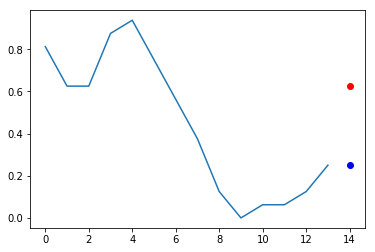

In [16]:
predictions = model.predict(test_x)
plot.plot(test_x[2])
plot.plot(14, test_y[2], 'ro')
plot.plot(14, predictions[2], 'bo')
predictions = model.predict(test_x)
plot.show()